In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from helper import AlphaStats, instrument_return, calc_alphas_corr
from alphas import *

# Prepare Dataset

In [2]:
dataset_dir = './USA_2010-2014_HLOCV'
os.listdir(dataset_dir)

['Open.csv', 'High.csv', 'Close.csv', 'Low.csv', 'Volume.csv']

In [3]:
open_df = pd.read_csv(dataset_dir + '/Open.csv')
high_df = pd.read_csv(dataset_dir + '/High.csv')
close_df = pd.read_csv(dataset_dir + '/Close.csv')
low_df = pd.read_csv(dataset_dir + '/Low.csv')
volume_df = pd.read_csv(dataset_dir + '/Volume.csv')

In [4]:
volume_df.drop(volume_df.columns[0], axis=1).to_numpy().T

array([[   1594,  266540,   13526, ...,  468921,  116790,   64951],
       [   5397,  234056,   32271, ...,  690225,  130915,   49928],
       [  11375,  260903,   31189, ...,  602835,  126101,   50373],
       ...,
       [   9215, 1007381,   20037, ...,  654736,  242690,   17550],
       [   5948, 1027726,   25448, ...,  801132,  314258,    9266],
       [   6202, 1321158,   15298, ...,  440245,  417663,   21498]])

In [5]:
INSTRUMENTS_RETURN = instrument_return(close_df)

In [20]:
dataset = DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df)

In [21]:
dataset.volume

array([[   1594,  266540,   13526, ...,  468921,  116790,   64951],
       [   5397,  234056,   32271, ...,  690225,  130915,   49928],
       [  11375,  260903,   31189, ...,  602835,  126101,   50373],
       ...,
       [   9215, 1007381,   20037, ...,  654736,  242690,   17550],
       [   5948, 1027726,   25448, ...,  801132,  314258,    9266],
       [   6202, 1321158,   15298, ...,  440245,  417663,   21498]])

# Build an Invest Portfolio

0 momentum_alpha

1 alpha_3

2 alpha_4

3 alpha_8

4 alpha_10

5 alpha_13

6 alpha_14

7 alpha_15

8 alpha_23

9 alpha_28

In [43]:
# momentum_alpha = MomentumAlpha(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_16 = Alpha16(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_3 = Alpha3(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_4 = Alpha4(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_8 = Alpha8(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_10 = Alpha10(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_13 = Alpha9(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_14 = Alpha14(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_15 = Alpha15(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_23 = Alpha23(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))
alpha_28 = Alpha28(DataSet(close_df=close_df, open_df=open_df, high_df=high_df, low_df=low_df, volume_df=volume_df))

[[      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]
 ...
 [  21838 1737222   24190 ... 1087658  254415   13259]
 [  22032 1727689   24769 ... 1094040  250324   14120]
 [  21165 1679973   24972 ... 1076896  250054   13562]]


In [44]:
alphas = [momentum_alpha, alpha_3, alpha_4,
          alpha_8, alpha_10, alpha_13,
          alpha_14, alpha_15, alpha_23, alpha_28]

In [45]:
corrs = [] 
for _alpha in alphas[:]:
    res = []
    for __alpha in alphas[:]:
        res.append(calc_alphas_corr(_alpha.get_alpha_income(), __alpha.get_alpha_income()))
    corrs.append(res)

<Axes: >

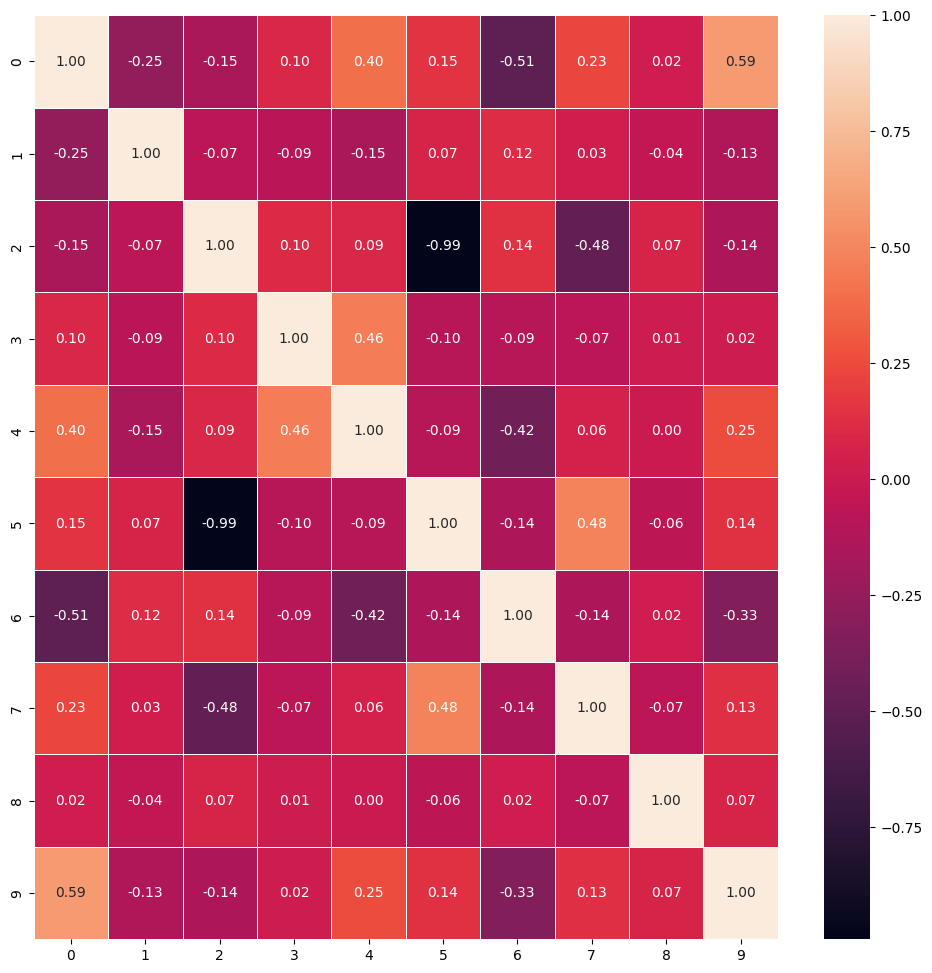

In [46]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corrs, annot=True, fmt=".2f",linewidth=.5)

In [ ]:
class Portfolio:
    def __init__(self, alphas: 'np.array[Alpha]') -> None:
        pass